## Importing libraries

In [1]:
#%pip install -U seaborn
#%pip install cufflinks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
%matplotlib inline
import cufflinks as cf


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

df = pd.read_csv('melb_data.csv')

## Data cleaning:

### Finding the amount null values for the four attributes that have null values.
- Credit: Julian Ryan

In [3]:
def remove_rows(col1, col2, col3, col4):
    count = 0
    types = df.dtypes
    for record_index in range(len(df)):
        incorrect_values = 0
        for key in df.keys():
            if key != "{}".format(col1) and key != "{}".format(col2):
                if pd.isna(df[key][record_index]):
                    incorrect_values+=1
                elif key == "{}".format(col3) or key == "{}".format(col4):
                    if df[key][record_index] == 0:
                        incorrect_values+=1
        if incorrect_values > 1:
            count+=1
            
    print(count)
    
remove_rows('BuildingArea', 'YearBuilt', 'Bedroom2', 'Bathroom')
remove_rows('Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt')
remove_rows('Bedroom2', 'BuildingArea', 'Bathroom', 'YearBuilt')

68
5264
675


### Finding number of null values for each of these attributes, where we found null values.
- Credit: Anu Ambekar and Julian Ryan (came up with idea).

In [4]:
df['Car'].isna().sum()  
df['YearBuilt'].isna().sum()   
df['BuildingArea'].isna().sum()
df['CouncilArea'].isna().sum()   

1369

- 62 null values for Car.
- 5375 null values for Year Built.
- 6450 null values for Building Area.
- 1369 null values for Council Area.

### Filling out null values of CouncilArea by linking each council to a range of suburbs, using .isin. 
- Credit: Alex Chung

In [5]:
# Rename df CouncilArea column for later concate
df = df.rename({'CouncilArea': 'X'}, axis=1)

# pd.set_option("max_rows", None)
pd.reset_option('display.max_rows')

# Group each Suburb to the right Council
bayside=df[df['Suburb'].isin(['Beaumaris','Black Rock','Brighton','Hampton','Hampton East','Sandringham', 'Brighton East'])]
bayside.loc[:, 'CouncilArea'] = 'Bayside'

banyule=df[df['Suburb'].isin(['Bellfield','Briar Hill','Eaglemont','Heidelberg','Heidelberg Heights','Heidelberg West','Ivanhoe','Ivanhoe East','Lower Plenty','Montmorency','Rosanna','St Helena','Viewbank','Watsonia','Watsonia North','Yallambie'])]
banyule.loc[:, 'CouncilArea'] = 'Banyule'

boroondara=df[df['Suburb'].isin(['Ashburton','Balwyn','Camberwell','Canterbury','Deepdene','Hawthorn','Hawthorn East','Kew','Kew East'])]
boroondara.loc[:, 'CouncilArea'] = 'Boroondara'

brimbank=df[df['Suburb'].isin(['Albanvale','Albion','Ardeer','Cairnlea','Calder Park','Deer Park','Delahey','Derrimut','Kealba','Keilor Downs','Keilor Lodge','Keilor North','Keilor Park','Kings Park','St Albans','Sunshine','Sunshine North','Sunshine West','Sydenham','Taylors Lakes'])]
brimbank.loc[:, 'CouncilArea'] = 'Brimbank'

cardinia=df[df['Suburb'].isin(['Avonsleigh','Bayles','Beaconsfield Upper','Bunyip','Bunyip North','Caldermeade','Cardinia','Catani','Clematis','Cockatoo','Cora Lynn','Dalmore','Dewhurst','Garfield','Garfield North','Gembrook','Guys Hill','Iona','Koo Wee Rup','Koo Wee Rup North','Lang Lang East','Maryknoll','Monomeith','Mount Burnett','Nangana','Nar Nar Goon','Nar Nar Goon North','Officer','Officer South','Pakenham','Pakenham South','Pakenham Upper','Rythdale','Tonimbuk','Tynong','Tynong North','Vervale','Yannathan'])]
cardinia.loc[:, 'CouncilArea'] = 'Cardinia'

casey=df[df['Suburb'].isin(['Berwick','Blind Bight','Botanic Ridge','Cannons Creek','Clyde','Clyde North','Cranbourne','Cranbourne East','Doveton','Eumemmerring','Hallam','Harkaway','Lynbrook','Warneet','Cranbourne North','Cranbourne South','Cranbourne West','Junction Village','Hampton Park','Endeavour Hills','Devon Meadows','Lysterfield South','Narre Warren','Narre Warren South','Narre Warren North'])]
casey.loc[:, 'CouncilArea'] = 'Casey'

frankston=df[df['Suburb'].isin(['Carrum Downs','Frankston North','Frankston South','Langwarrin South','Sandhurst','Seaford','Skye','Frankston','Langwarrin'])]
frankston.loc[:, 'CouncilArea'] = 'Frankston'

darebin=df[df['Suburb'].isin(['Kingsbury','Northcote','Preston','Reservoir','Thornbury'])]
darebin.loc[:, 'CouncilArea'] = 'Darebin'

greater_dandenong=df[df['Suburb'].isin(['Bangholme','Dandenong','Dandenong North','Dandenong South','Springvale South','Noble Park North','Noble Park','Keysborough','Springvale'])]
greater_dandenong.loc[:, 'CouncilArea'] = 'Greater Dandenong'

glen_eira=df[df['Suburb'].isin(['Bentleigh','Carnegie','Caulfield','Gardenvale','Elsternwick','McKinnon','Murrumbeena','Ormond','Bentleigh East','Caulfield East','Caulfield North','Caulfield South','Glen Huntly'])]
glen_eira.loc[:, 'CouncilArea'] = 'Glen Eira'
                          
hobsons_bay=df[df['Suburb'].isin(['Altona','Newport','Seabrook','Seaholme','Spotswood','Williamstown','Williamstown North','South Kingsville','Altona Meadows','Altona North'])]
hobsons_bay.loc[:, 'CouncilArea'] = 'Hobsons Bay'
                           
wyndham=df[df['Suburb'].isin(['Cocoroc','Tarneit','Quandong','Mambourin','Werribee','Hoppers Crossing','Laverton North','Point Cook','Wyndham Vale','Williams Landing','Werribee South'])]
wyndham.loc[:, 'CouncilArea'] = 'Wyndham'
                           
hume=df[df['Suburb'].isin(['Attwood','Broadmeadows','Bulla','Campbellfield','Kalkallo','Jacana','Greenvale','Dallas','Craigieburn','Coolaroo','Mickleham','Somerton','Sunbury','Yuroke','Wildwood','Westmeadows','Meadow Heights','Melbourne Airport','Oaklands Junction','Roxburgh Park','Gladstone Park'])]
hume.loc[:, 'CouncilArea'] = 'Hume'

manningham=df[df['Suburb'].isin(['Bulleen','Doncaster','Donvale','Warrandyte','Templestowe','Templestowe Lower','Warrandyte South','Doncaster East'])]
manningham.loc[:, 'CouncilArea'] = 'Manningham'
                             
knox=df[df['Suburb'].isin(['Bayswater','Boronia','Knoxfield','Scoresby','Rowville','Wantirna','Wantirna South','The Basin','Ferntree Gully'])]
knox.loc[:, 'CouncilArea'] = 'Knox'
                            
kingston=df[df['Suburb'].isin(['Aspendale','Bonbeach','Braeside','Carrum','Chelsea','Clarinda','Edithvale','Heatherton','Mentone','Moorabbin','Mordialloc','Parkdale','Waterways','Patterson Lakes','Moorabbin Airport','Dingley Village','Clayton South','Chelsea Heights','Aspendale Gardens'])]
kingston.loc[:, 'CouncilArea'] = 'Kingston'
 
maribyrnong=df[df['Suburb'].isin(['Braybrook', 'Footscray', 'Kingsville', 'Maidstone', 'Maribyrnong', 'Seddon', 'Tottenham', 'West Footscray', 'Yarraville'])]
maribyrnong.loc[:, 'CouncilArea'] = 'Maribyrnong'
                               
maroondah=df[df['Suburb'].isin(['Bayswater North','Croydon','Ringwood','Warranwood','Croydon Hills','Croydon North','Croydon South','Kilsyth South','Ringwood East'])]
maroondah.loc[:, 'CouncilArea'] = 'Maroondah'
                               
melbourne=df[df['Suburb'].isin(['Carlton', 'Docklands', 'East Melbourne', 'Melbourne', 'North Melbourne', 'Parkville', 'West Melbourne'])]
melbourne.loc[:, 'CouncilArea'] = 'Melbourne'
                               
moreland=df[df['Suburb'].isin(['Brunswick', 'Brunswick East', 'Brunswick West', 'Coburg', 'Coburg North', 'Fawkner', 'Glenroy', 'Gowanbrae', 'Hadfield', 'Oak Park', 'Pascoe Vale','Pascoe Vale South'])]
moreland.loc[:, 'CouncilArea'] = 'Moreland'
                               
monash=df[df['Suburb'].isin(['Ashwood',  'Clayton', 'Glen Waverley', 'Hughesdale', 'Huntingdale', 'Mount Waverley', 'Mulgrave', 'Notting Hill', 'Oakleigh', 'Oakleigh East',  'Wheelers Hill'])]
monash.loc[:, 'CouncilArea'] = 'Monash'
                               
melton=df[df['Suburb'].isin(['Brookfield', 'Burnside Heights', 'Caroline Springs',  'Kurunjang', 'Melton', 'Melton South', 'Melton West', 'Rockbank', 'Taylors Hill'])]
melton.loc[:, 'CouncilArea'] = 'Melton'
                               
moonee_valley=df[df['Suburb'].isin(['Keilor East','Aberfeldie', 'Airport West', 'Ascot Vale', 'Avondale Heights', 'Essendon', 'Essendon North', 'Essendon West',  'Moonee Ponds', 'Niddrie', 'Strathmore', 'Strathmore Heights', 'Travancore'])]
moonee_valley.loc[:, 'CouncilArea'] = 'Moonee Valley'
                               
stonnington=df[df['Suburb'].isin(['Armadale', 'Kooyong', 'Malvern', 'Malvern East', 'Prahran', 'Toorak'])]
stonnington.loc[:, 'CouncilArea'] = 'Stonnington'
                               
yarra=df[df['Suburb'].isin(['Abbotsford', 'Burnley',  'Clifton Hill', 'Collingwood', 'Cremorne',  'Fitzroy', 'Princes Hill', 'Richmond'])]
yarra.loc[:, 'CouncilArea'] = 'Yarra'
                               
port_phillip=df[df['Suburb'].isin(['Albert Park', 'Balaclava', 'Elwood', 'Middle Park',  'Ripponlea', 'South Melbourne', 'St Kilda'])]
banyule.loc[:, 'CouncilArea'] = 'Banyule'
                               
whitehorse=df[df['Suburb'].isin(['Blackburn', 'Blackburn North', 'Blackburn South', 'Box Hill',  'Burwood East', 'Forest Hill', 'Mitcham',  'Vermont South'])]
whitehorse.loc[:, 'CouncilArea'] = 'Whitehorse'

whittlesea=df[df['Suburb'].isin([ 'Epping', 'Lalor', 'Mernda', 'Mill Park', 'South Morang', 'Thomastown', 'Whittlesea', 'Wollert'])]
whittlesea.loc[:, 'CouncilArea'] = 'Whittlesea'

nillumbik=df[df['Suburb'].isin(['Diamond Creek', 'Eltham',  'Hurstbridge', 'North Warrandyte'])]
nillumbik.loc[:, 'CouncilArea'] = 'Nillumbik'

yarra_ranges=df[df['Suburb'].isin(['Chirnside Park', 'Healesville', 'Montrose', 'Mooroolbark', 'Mount Evelyn', 'Silvan', 'Upwey', 'Yarra Glen'])]
yarra_ranges.loc[:, 'CouncilArea'] = 'Yarra Ranges'

macedon_ranges=df[df['Suburb'].isin(['Bullengarook', 'Gisborne', 'Riddells Creek'])]
macedon_ranges.loc[:, 'CouncilArea'] = 'Macedon Ranges'

moorabool=df[df['Suburb'].isin(['Bacchus Marsh'])]
moorabool.loc[:, 'CouncilArea'] = 'Moorabool'

part=df[df['Suburb'].isin(['Cheltenham','Oakleigh South','Eltham North', 'Greensborough','Carlton North','Alphington','Doreen','Burwood', 'Chadstone','Southbank', 'Windsor','Highett','Bundoora','Diggers Rest','Fairfield', 'Hillside','Eltham North','Flemington', 'Kensington','Upper Ferntree Gully','Port Melbourne', 'South Yarra', 'Greensborough','Macleod','Fitzroy North','Surrey Hills','Mont Albert','Balwyn North','Glen Iris','Brooklyn','Hillside','Keilor','Tullamarine','Beaconsfield','Emerald','Heath Hill','Lang Lang','Modella','Menzies Creek','Longwarry','Nyora','Tooradin','Beaconsfield','Lyndhurst','Pearcedale','Tooradin','Alphington','Fairfield','Macleod','Lyndhurst','Brighton East','St Kilda East','Laverton','Eynesbury','Truganina','Mount Cottrell','Little River','Clarkefield','Diggers Rest','Nunawading','Park Orchards','Ringwood North','Wonga Park','Lysterfield','Sassafras','Oakleigh South','Wonga Park','Vermont','Ringwood North','Park Orchards','Kilsyth'])]
part.loc[:, 'CouncilArea'] = part['X']

councilList=[banyule, bayside, boroondara, brimbank, cardinia, casey, darebin,  frankston, glen_eira, greater_dandenong, hobsons_bay, hume, kingston, maribyrnong, knox, macedon_ranges, manningham, maroondah, melbourne, melton, monash, moonee_valley, moorabool, moreland, nillumbik, part, port_phillip, stonnington, whitehorse, whittlesea, wyndham, yarra, yarra_ranges]

# Concatenate each Council to create a new dataframe with updated value for CouncilArea 
df=pd.concat(councilList, ignore_index=False)

# Drop column X which contain null values for CouncilArea
df=df.drop('X',1)

# Sort rows on index 0-13579
df=df.sort_index()

### Replacing null values and zeros in building area with the median value, based on the type of house: house, unit or townhouse. If the null value is of a house, then the median value imputed will be the value of that of the house.
- Credit: Anu Ambekar, Alex Chung (came up with idea).

In [6]:
#df.isna().sum()
#car=df[df['Car'].isnull()]
df_h = df.loc[df["Type"]=="h"]
df_u = df.loc[df["Type"]=="u"]
df_t = df.loc[df["Type"]=="t"]

df_h['BuildingArea'].fillna(df_h['BuildingArea'].median(), inplace=True)
df_u['BuildingArea'].fillna(df_u['BuildingArea'].median(), inplace=True)
df_t['BuildingArea'].fillna(df_t['BuildingArea'].median(), inplace=True)

h_median=df_h['BuildingArea'].median()
u_median=df_u['BuildingArea'].median()
t_median=df_t['BuildingArea'].median()

df_h['BuildingArea'].replace(to_replace=0, value=h_median, inplace=True)
df_u['BuildingArea'].replace(to_replace=0, value=u_median, inplace=True)
df_t['BuildingArea'].replace(to_replace=0, value=t_median, inplace=True)

df = pd.concat([df_h, df_u, df_t])


### Filling out null values for car spaces, based on the median car spaces for houses, units and townhouses. The process is similar to building area.
- Credit: Anu Ambekar, Alex Chung (came up with idea).

In [7]:
h_car=df_h['Car'].median()
u_car=df_u['Car'].median()
t_car=df_t['Car'].median()

df_h['Car'].fillna(df_h['Car'].median(), inplace=True)
df_u['Car'].fillna(df_u['Car'].median(), inplace=True)
df_t['Car'].fillna(df_t['Car'].median(), inplace=True)

df = pd.concat([df_h, df_u, df_t])

### Imputing a dummy variable into YearBuilt
- Credit: Anu Ambekar

In [8]:
for item in df.keys():
    print(df[item][9968])
df['YearBuilt'][9968]=0
for item in df.keys():
    print(df[item][6677])

Mount Waverley
5 Armstrong St
3
h
1200000.0
VB
McGrath
24/06/2017
14.2
3149.0
3.0
1.0
4.0
807.0
117.0
1196.0
-37.86788
145.12121000000005
Eastern Metropolitan
13366.0
Monash
Yarraville
25 Norfolk St
3
h
950000.0
SP
Village
16/04/2016
7.0
3013.0
3.0
1.0
2.0
240.0
84.0
1880.0
-37.8202
144.8896
Western Metropolitan
6543.0
Maribyrnong


### Some landsize values were incorrect. We had to manually change these values using df.at to find the index, get the attribute that we want to be changed at that index, and then outline the value to be imputed.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [9]:
df.at[3318, 'Landsize']=590
df.at[10581, 'Landsize']=290
df.at[7710, 'Landsize']=869
df.at[8688, 'Landsize']=3474
df.at[11144, 'Landsize']=414
df.at[11507, 'Landsize']=543
df.at[6019, 'Landsize']=108
df.at[8364, 'Landsize']=745
df.at[10865, 'Landsize']=6090
df.at[8396, 'Landsize']=1550
df.at[10262, 'Landsize']=657
df.at[994, 'Landsize']=29
df.at[8811, 'Landsize']=df['Landsize'].median()
df.at[8709, 'Landsize']=777
df.at[10921, 'Landsize']=428
df.at[5958, 'Landsize']=360
df.at[7303, 'Landsize']=36
df.at[7743, 'Landsize']=7355
df.at[9660, 'Landsize']=36
df.at[11322, 'Landsize']=137
df.at[10166, 'Landsize']=866
df.at[4915, 'Landsize']=72
df.at[10278, 'Landsize']=2782
df.at[2007, 'Landsize']=596
df.at[10523, 'Landsize']=44
df.at[11541, 'Landsize']=45
df.at[7823, 'Landsize']=45
df.at[2664, 'Landsize']=44
df.at[4690, 'Landsize']=49
df.at[3902, 'Landsize']=36
df.at[4597, 'Landsize']=759
df.at[6553, 'Landsize']=df["Landsize"].median()
df.at[3919, 'Landsize']=53
df.at[6473, 'Landsize']=53
df.at[3952, 'Landsize']=df["Landsize"].median()
df.at[10165, 'Landsize']=54
df.at[3463, 'Landsize']=54
df.at[3954, 'Landsize']=df["Landsize"].median()
df.at[5391, 'Landsize']=54
df.at[4376, 'Landsize']=54
df.at[4425, 'Landsize']=55
df.at[3388, 'Landsize']=55
df.at[8026, 'Landsize']=54
df.at[4403, 'Landsize']=55
df.at[1369, 'Landsize']=55
df.at[6504, 'Landsize']=56
df.at[11745, 'Landsize']=44
df.at[10469, 'Landsize']=57
df.at[6383, 'Landsize']=56
df.at[5353, 'Landsize']=57
df.at[5284, 'Landsize']=58
df.at[9616, 'Landsize']=58
df.at[2704, 'Landsize']=58
df.at[11179, 'Landsize']=59
df.at[9972, 'Landsize']=60
df.at[1708, 'Landsize']=14
df.at[9539, 'Landsize']=60
df.at[11314, 'Landsize']=1323
df.at[8490, 'Landsize']=134
df.at[9057, 'Landsize']=61
df.at[13574, 'Landsize']=0

### Replacing landsizes of zero with the median landsizes for houses, units and townhouses.
- Credits: Anu Ambekar, Alex Chung (came up with the idea).

In [10]:
h_size=df_h['Landsize'].median()
u_size=df_u['Landsize'].median()
t_size=df_t['Landsize'].median()

df_h['Landsize'].fillna(df_h['Landsize'].median(), inplace=True)
df_u['Landsize'].fillna(df_u['Landsize'].median(), inplace=True)
df_t['Landsize'].fillna(df_t['Landsize'].median(), inplace=True)

df = pd.concat([df_h, df_u, df_t])

### In this dataset, the number of rooms did not have a clear patter at all, relative to the bathrooms and the bedrooms. For example, a house could have 1 bathroom, 1 bedroom and 0 rooms. So we created a pattern, that made sense such that the number of rooms was the sum of bathrooms and bedrooms in the house.
- Credit: Anu Ambekar

In [11]:
df['Rooms'] = df['Bedroom2'] + df['Bathroom']

### Changing bedroom and bathroom values using df.at again, using imputation because some of the values were false. We went to search the true values of these houses on the Internet and replaced the bedroom and bathroom values as such.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [12]:
df.at[135, 'Bedroom2'] = 3
df.at[804, 'Bedroom2'] = 3
df.at[827, 'Bedroom2'] = 4
df.at[913, 'Bedroom2'] = 3
df.at[2253, 'Bedroom2'] = 2
df.at[3360, 'Bedroom2'] = 4
df.at[4922, 'Bedroom2'] = 3
df.at[6170, 'Bedroom2'] = 3
df.at[6866, 'Bedroom2'] = 2
df.at[6893, 'Bedroom2'] = 3
df.at[7385, 'Bedroom2'] = 3
df.at[7494, 'Bedroom2'] = 3
df.at[8301, 'Bedroom2'] = 3
df.at[8998, 'Bedroom2'] = 5
df.at[9330, 'Bedroom2'] = 2
df.at[9917, 'Bedroom2'] = 2
df.at[11204, 'Bedroom2'] = 3
df.at[4922, 'Bedroom2'] = 3
df.at[139, 'Bathroom'] = 3
df.at[281, 'Bathroom'] = 1
df.at[505, 'Bathroom'] = 1
df.at[584, 'Bathroom'] = 2
df.at[913, 'Bathroom'] = 1
df.at[1063, 'Bathroom'] = 1
df.at[1070, 'Bathroom'] = 1
df.at[1593, 'Bathroom'] = 1
df.at[2253, 'Bathroom'] = 1
df.at[2777, 'Bathroom'] = 1
df.at[2797, 'Bathroom'] = 2
df.at[2808, 'Bathroom'] = 1
df.at[3390, 'Bathroom'] = 1
df.at[3556, 'Bathroom'] = 1
df.at[3787, 'Bathroom'] = 1
df.at[4880, 'Bathroom'] = 1
df.at[5535, 'Bathroom'] = 1
df.at[5642, 'Bathroom'] = 2
df.at[5711, 'Bathroom'] = 2
df.at[6392, 'Bathroom'] = 2
df.at[6406, 'Bathroom'] = 1
df.at[6651, 'Bathroom'] = 1
df.at[6671, 'Bathroom'] = 1
df.at[6856, 'Bathroom'] = 1
df.at[6866, 'Bathroom'] = 1
df.at[6938, 'Bathroom'] = 1
df.at[7494, 'Bathroom'] = 1
df.at[8010, 'Bathroom'] = 2
df.at[8271, 'Bathroom'] = 1
df.at[9090, 'Bathroom'] = 1
df.at[9917, 'Bathroom'] = 1
df.at[10795, 'Bathroom'] = 1
df.at[10895, 'Bathroom'] = 1
df.at[11204, 'Bathroom'] = 1

### Filling the null YearBuilt values with a dummy value of zero. 
- Credits: Anu Ambekar

In [13]:
df["YearBuilt"].fillna(0, inplace=True)
df['BuildingArea'].isna().sum()

0

### Dropping values where the number of rooms is zero. No property can have zero rooms.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [14]:
#Cut values where room = 0.
df=df.drop(index=913)
df=df.drop(index=2253)
df=df.drop(index=6866)
df=df.drop(index=7494)
df=df.drop(index=9917)
df=df.drop(index=11204)
df=df.reset_index(drop=True)

### Finding the amount of null values for the four attributes that registered null values. Only council area saw some null values, but the number has been approximately halved. So these null values will be culled with df.dropna in the next cell.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [15]:
df['Car'].isna().sum() 
df['YearBuilt'].isna().sum()  
df['BuildingArea'].isna().sum()  
df['CouncilArea'].isna().sum()   

723

- After data cleaning, there were:
- 0 null values for car.
- 0 null values for building area.
- 723 (almost half) of null values in council area.

### Using df.dropna and changing the data types of attributed that did not need to be floats, such as postcode (no decimal value for postcode) as well as propertycount, bathroom, bedroom, year built and rooms.
- Credits: Anu Ambekar

In [16]:
df=df.dropna()
df["Postcode"] = df["Postcode"].astype(int)
df["Propertycount"] = df["Propertycount"].astype(int)
df["Bathroom"] = df["Bathroom"].astype(int)
df["Bedroom2"] = df["Bedroom2"].astype(int)
df["YearBuilt"] = df["YearBuilt"].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['Car'] = df['Car'].astype(int)

### Creating separate columns for month and year so we can do calculations for these individual attributes.
- Credits: Anu Ambekar

In [17]:
def get_month(m):
    return m.split("/")[1]

def get_year(y):
    return y.split("/")[2]

df["Month"] = df["Date"].apply(lambda x: f"{get_month(x)}")
df["Year"] = df["Date"].apply(lambda x: f"{get_year(x)}")


#df.head()

### Changing month to date-time
- Credits: Anu Ambekar

In [18]:
df["Month"] = pd.to_datetime(df["Month"], format="%m").dt.month_name()

In [19]:
df["Month/Year"] = df["Month"] + " " + df["Year"]

### Further imputation, where unreasonable values were found.
- Credits: Anu Ambekar

In [20]:
df=df.loc[df["Price"]!=9000000]
df_nozero=df.loc[df["YearBuilt"]>1196]
df.at[1927, 'Car'] = 2
df.at[1927, 'Date'] = "27/8/2016"
df.at[1927, 'Price']=1520000
df.at[1805, 'Price']=1350000
df.at[7404, 'Bedroom2']=2

In [30]:
arr1=np.array(df["Price"])
arr2=np.array(df["Rooms"])
arr3=np.array(df["BuildingArea"])
arr4=np.array(df["Distance"])
arr5=np.array(df["Bedroom2"])
arr6=np.array(df["Bathroom"])
arr7=np.array(df['Car'])
arr8=np.array(df['Landsize'])
arr9=np.array(df['BuildingArea'])
arr10=np.array(df['Propertycount'])
arr11 = np.array(df["YearBuilt"])
arr12 = np.array(df["Date"])

In [31]:
np.corrcoef(arr1, arr2) 
np.corrcoef(arr1, arr3) 
np.corrcoef(arr1, arr4) 
np.corrcoef(arr1, arr5) 
np.corrcoef(arr1, arr6) 
np.corrcoef(arr1, arr7) 
np.corrcoef(arr2, arr5) 
np.corrcoef(arr2, arr3) 
np.corrcoef(arr1, arr11)
np.corrcoef(arr2, arr6) 

array([[1.        , 0.84680754],
       [0.84680754, 1.        ]])

In [32]:
df[["Price", "Rooms"]].corr(method="spearman") 
df[["Price", "BuildingArea"]].corr(method="spearman") 
df[["Price", "Distance"]].corr(method="spearman") 
df[["Price", "Bedroom2"]].corr(method="spearman") 
df[["Price", "Bathroom"]].corr(method="spearman") 
df[["Price", "Car"]].corr(method="spearman") 

Price       Car
Price  1.000000  0.297791
Car    0.297791  1.000000

### Calculating zscores for new columns to show the zscores for landsize, price and building area:
- Credits: Anu Ambekar

In [33]:
mean_price=df["Price"].mean() 
mean_std=df["Price"].std()
df["Price_ZScore"] = (df["Price"] - mean_price)/mean_std

In [34]:
mean_size=df["Landsize"].mean() 
mean_size_std=df["Landsize"].std()
df["Landsize_ZScore"] = (df["Landsize"] - mean_size)/mean_size_std

In [35]:
mean_area=df["BuildingArea"].mean() 
mean_area_std=df["BuildingArea"].std()
df["BuildingArea_ZScore"] = (df["BuildingArea"] - mean_area)/mean_area_std

In [36]:
df.at[4922, 'Bedroom2'] = 3

### Confidence Intervals and Z-Scores:
- Credits: Anu Ambekar

In [37]:
def confidence_interval(frac, attribute):
    ci=pd.DataFrame(df, columns={'{}'.format(attribute):df[attribute]})
    ci=ci.sample(frac=frac)
    mean = ci[attribute].mean()
    std = ci.std()
    std = std[0]
    size = len(ci)
    std_error=std/np.sqrt(size)
    x=std_error * 2.16
    upper = mean + x
    lower = mean - x
    
    return lower, upper, df[attribute].mean()

confidence_interval(0.5, 'Price')

(1049105.7967132868, 1082090.7351392505, 1071850.6503933363)

In [38]:
X = df["Lattitude"]
Y = df["Longtitude"]
Z = df["Price"]
minX = min(X)
maxX = max(X)
minY = min(Y)
maxY = max(Y)
minZ = min(Z)
maxZ = max(Z)

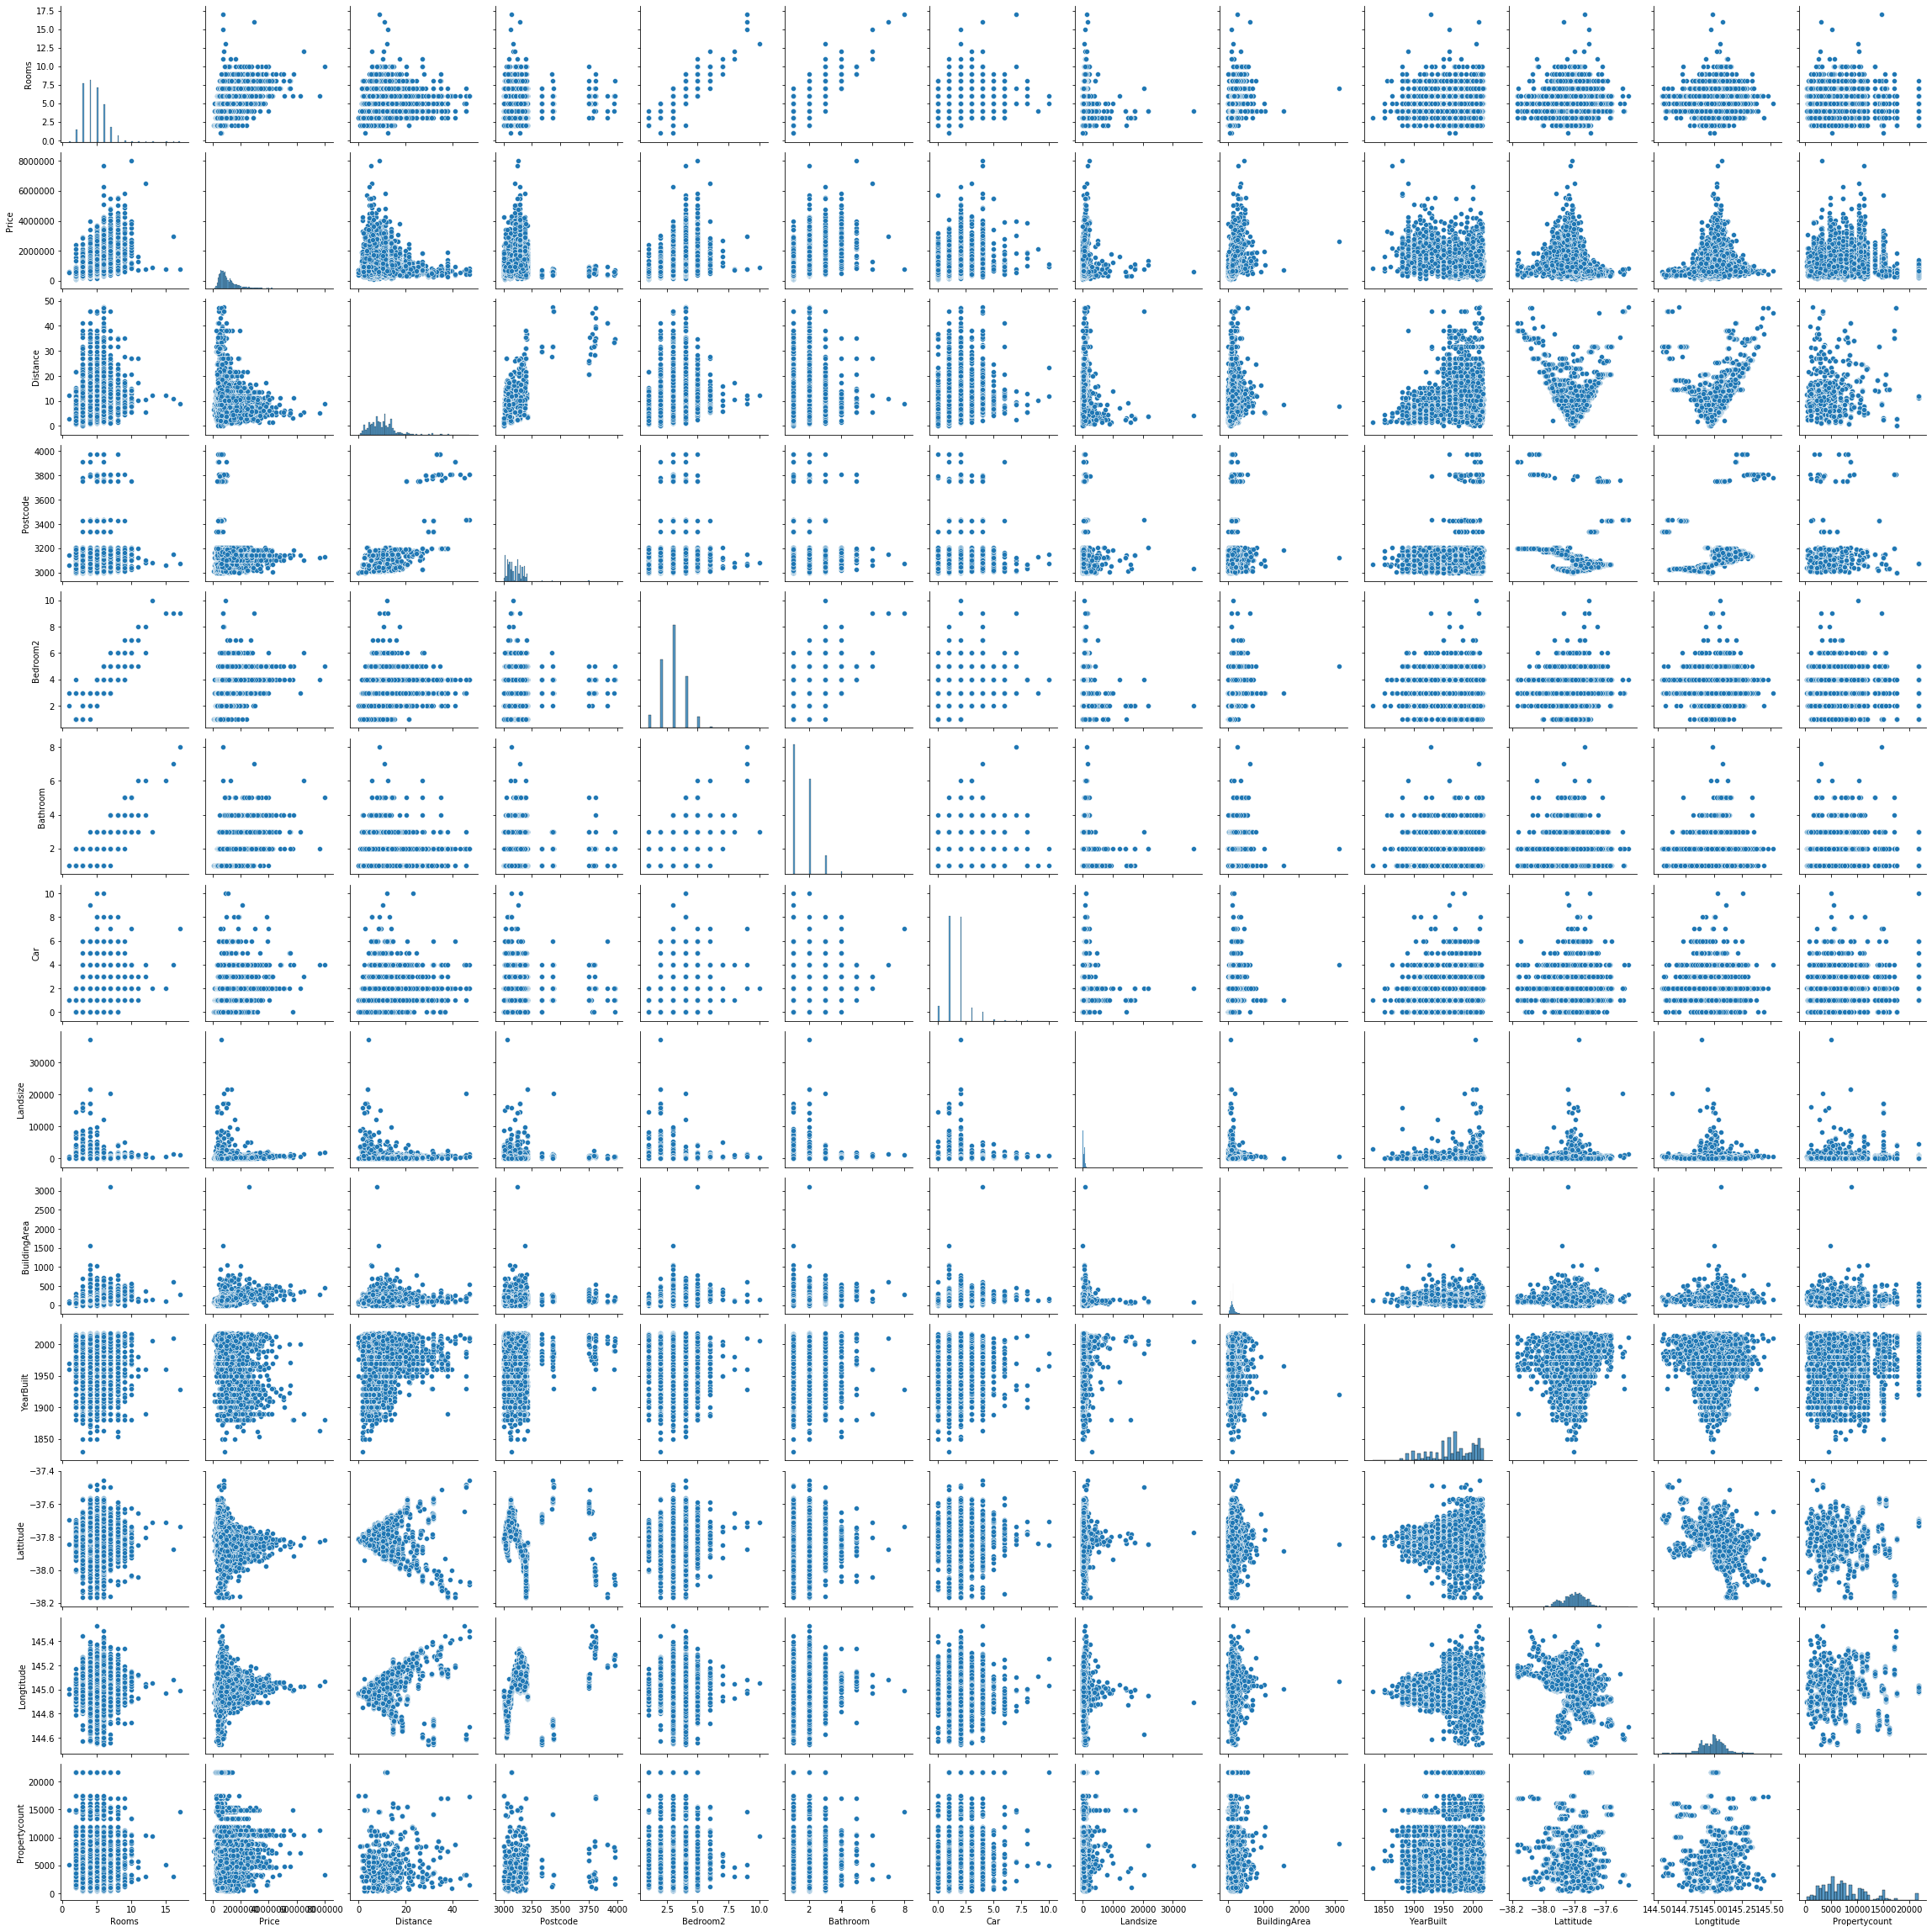

In [88]:
#The code example below will display all of the integers and floats in correlation to each other

#Warning: code takes a few minutes to load
sns.pairplot(df_nozero)

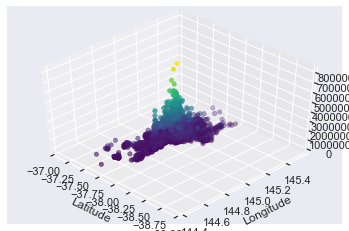

In [90]:
#Testing a 3D graph of the prices in comparison to the latitude and longitude
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

sns.set(style = "darkgrid")
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(45, -45)
ax.set_xlim(-39, -37)
ax.invert_xaxis()

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Price")

ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5)

plt.show()

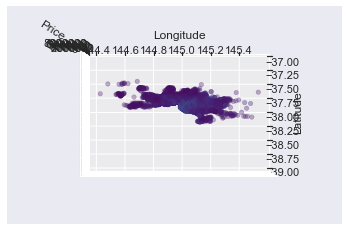

In [91]:
#The exact same 3D graph on a different angle
fig = plt.figure()

sns.set(style = "darkgrid")
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(90, 0)
ax.set_xlim(-39, -37)
ax.invert_xaxis()

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Price")
ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.5)

plt.show()

In [40]:
#Turning the df_nozero's indexes from 1, 2, 4, etc. into 0, 1, 2, 3, etc.
df_nozero = df_nozero.set_index(pd.Series(range(len(df_nozero))))
df_nozero

Suburb               Address  Rooms Type      Price Method  \
0         Abbotsford       25 Bloomburg St      3    h  1035000.0      S   
1         Abbotsford          5 Charles St      5    h  1465000.0     SP   
2         Abbotsford           55a Park St      4    h  1600000.0     VB   
3         Abbotsford          124 Yarra St      6    h  1876000.0      S   
4         Abbotsford         98 Charles St      3    h  1636000.0      S   
...              ...                   ...    ...  ...        ...    ...   
7816  Bentleigh East           28 Melva St      6    t  1130000.0      S   
7817  Brunswick East         10B Albion St      5    t   959000.0      S   
7818       Gowanbrae         24 Duranta Dr      7    t   655000.0      S   
7819  Mount Waverley  2/392 Stephensons Rd      5    t  1035000.0     SP   
7820       Reservoir           1E Black St      4    t   640000.0     PI   

      SellerG        Date  Distance  Postcode  ...  BuildingArea  YearBuilt  \
0      Biggin   4/02/2016       2.5      3067  ...          79.0       1900   
1      Biggin   4/03/2017       2.5      3067  ...         150.0       1900   
2      Nelson   4/06/2016       2.5      3067  ...         142.0       2014   
3      Nelson   7/05/2016       2.5      3067  ...         210.0       1910   
4      Nelson   8/10/2016       2.5      3067  ...         107.0       1890   
...       ...         ...       ...       ...  ...           ...        ...   
7816   Buxton  26/08/2017      13.8      3165  ...         183.0       2012   
7817   Jellis  26/08/2017       4.0      3057  ...         122.0       1998   
7818   Nelson  26/08/2017      12.9      3043  ...         215.0       2017   
7819  McGrath  26/08/2017      14.2      3149  ...         138.0       2006   
7820      Ray  26/08/2017      12.0      3073  ...         128.0       2008   

      Lattitude  Longtitude             Regionname  Propertycount  \
0     -37.80790   144.99340  Northern Metropolitan           4019   
1     -37.80930   144.99440  Northern Metropolitan           4019   
2     -37.80720   144.99410  Northern Metropolitan           4019   
3     -37.80240   144.99930  Northern Metropolitan           4019   
4     -37.80600   144.99540  Northern Metropolitan           4019   
...         ...         ...                    ...            ...   
7816  -37.90866   145.07533  Southern Metropolitan          10969   
7817  -37.76292   144.97975  Northern Metropolitan           5533   
7818  -37.70128   144.90187   Western Metropolitan           1071   
7819  -37.88678   145.12748   Eastern Metropolitan          13366   
7820  -37.71289   145.01967  Northern Metropolitan          21650   

      CouncilArea     Month  Year     Month/Year  
0           Yarra  February  2016  February 2016  
1           Yarra     March  2017     March 2017  
2           Yarra      June  2016      June 2016  
3           Yarra       May  2016       May 2016  
4           Yarra   October  2016   October 2016  
...           ...       ...   ...            ...  
7816    Glen Eira    August  2017    August 2017  
7817     Moreland    August  2017    August 2017  
7818     Moreland    August  2017    August 2017  
7819       Monash    August  2017    August 2017  
7820      Darebin    August  2017    August 2017  

[7821 rows x 24 columns]

In [ ]:
#This code block creates the conditional_probabilities.npy file to save on your laptop.
#It will also create smaller segments of the file in case the main file fails.
#The code doesn't do anything else important.
#If you do not wish to run this code, download the conditional_probabilities.npy file
#The other alternative is to run the code and wait approximately half an hour.
#Code is hard to understand so only try to understand it if you must

#WARNING: This block of code takes approximately half an hour to run.
from datetime import datetime
array4 = []
for sub_keys in df_nozero.keys():
    array_type = type(df_nozero[sub_keys][1])
    if array_type == np.float64 or array_type == np.int32:
        array3 = []
        for main_key in df_nozero.keys():
            array_type2 = type(df_nozero[main_key][1])
            if array_type2 == np.float64 or array_type2 == np.int32:
                now = datetime.now()
                bins = np.histogram_bin_edges(a=df_nozero[main_key], bins='auto', range=(df_nozero[main_key].min(), df_nozero[main_key].max()))
                if array_type2 == np.float64:
                    None
                elif array_type2 == np.int32:
                    bins2 = [i for i in range(int(bins[0]), int(bins[-1] + 1))]
                    if len(bins2) < len(bins):
                        bins = bins2
                array2 = [[] for i in range(len(bins))]
                for df_row_index in range(len(df_nozero[sub_keys])):
                    for bins_index in range(len(bins)):
                        if bins_index < len(bins) - 1:
                            lower = bins[bins_index]
                            upper = bins[bins_index+1]
                            if lower <= df_nozero[main_key][df_row_index] and df_nozero[main_key][df_row_index] < upper:
                                array2[bins_index].append(df_nozero[sub_keys][df_row_index])
                                break
                        elif bins_index == len(bins)-1:
                            array2[len(bins)-1].append(df_nozero[sub_keys][df_row_index])
                            break
                now2 = datetime.now()
                print(main_key, sub_keys)
                print("Array took " + str((now2 - now).total_seconds()) + " seconds to generate ")
                print("Bin size: " + str(len(bins)))
                print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
                array3.append(array2)
        array3 = np.array(array3)
        array4.append(array3)
        file_name = str(sub_keys)
        np.save(file_name, array3)
        print("Saved " + file_name + ".npy")
        print("================================================================================")
np.save("conditional_probabilities", array4)

In [41]:
#The code below will load up the conditional_probabilities.npy file. This File has 4 dimensions
#The first index is the column of the main 2D array
#The second index is the row inside of the column, mentioned in the first index. Now the smaller 2D array has been obtained
#The third index represents the row inside of the sub-array selected.
#Do note each smaller 2D array has a key on the left. Each row in the smaller 2D array represents a series of arrays
#distributed depending on their number of keys. rows should be distributed based on the bin amount in a histogram of the key
#The fourth index represents the element in the smaller array's row. 
#[4D Array column][4D array row or index 2][index 2's condition][value]
testdata = np.load('conditional_probabilities.npy', allow_pickle=True)

In [42]:
#Creates an empty dataframe with 100 extra test cases
test = pd.DataFrame(np.array([[np.nan for i in range(len(df_nozero.keys()))] for j in range(100)]).T, df_nozero.keys()).T
test

Suburb  Address  Rooms  Type  Price  Method  SellerG  Date  Distance  \
0      NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
1      NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
2      NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
3      NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
4      NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
..     ...      ...    ...   ...    ...     ...      ...   ...       ...   
95     NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
96     NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
97     NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
98     NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   
99     NaN      NaN    NaN   NaN    NaN     NaN      NaN   NaN       NaN   

    Postcode  ...  BuildingArea  YearBuilt  Lattitude  Longtitude  Regionname  \
0        NaN  ...           NaN        NaN        NaN         NaN         NaN   
1        NaN  ...           NaN        NaN        NaN         NaN         NaN   
2        NaN  ...           NaN        NaN        NaN         NaN         NaN   
3        NaN  ...           NaN        NaN        NaN         NaN         NaN   
4        NaN  ...           NaN        NaN        NaN         NaN         NaN   
..       ...  ...           ...        ...        ...         ...         ...   
95       NaN  ...           NaN        NaN        NaN         NaN         NaN   
96       NaN  ...           NaN        NaN        NaN         NaN         NaN   
97       NaN  ...           NaN        NaN        NaN         NaN         NaN   
98       NaN  ...           NaN        NaN        NaN         NaN         NaN   
99       NaN  ...           NaN        NaN        NaN         NaN         NaN   

    Propertycount  CouncilArea  Month  Year  Month/Year  
0             NaN          NaN    NaN   NaN         NaN  
1             NaN          NaN    NaN   NaN         NaN  
2             NaN          NaN    NaN   NaN         NaN  
3             NaN          NaN    NaN   NaN         NaN  
4             NaN          NaN    NaN   NaN         NaN  
..            ...          ...    ...   ...         ...  
95            NaN          NaN    NaN   NaN         NaN  
96            NaN          NaN    NaN   NaN         NaN  
97            NaN          NaN    NaN   NaN         NaN  
98            NaN          NaN    NaN   NaN         NaN  
99            NaN          NaN    NaN   NaN         NaN  

[100 rows x 24 columns]

In [43]:
#Imports the random library
import random

In [49]:
#The function for taking the testdata file and returning a series of estimated keys and values
def random_numbers(): 
    number_values = []
    number_keys = []
    key1_index = 0
    
    #Iterates through each key in the array and ensures the key is either a float or an integer
    for key in df_nozero.keys():
        array_type = type(df_nozero[key][1])
        if array_type == np.float64 or array_type == np.int32:
            
            #If the key is the first key, calculate the value based on what should be expected in a histogram.
            #If this isn't the case, the code follows a more complex algorithm
            if key == "Rooms":
                data = testdata[0][0]
                bins = np.histogram_bin_edges(a=df_nozero["Rooms"], bins='auto', range=(df_nozero["Rooms"].min(), df_nozero["Rooms"].max()))
                if type(data[0][0]) == np.float64:
                    None
                elif type(data[0][0]) == np.int32:

                    bins2 = [i for i in range(int(bins[0]), int(bins[-1] + 1))]
                    if len(bins2) < len(bins):
                        bins = bins2
                rooms = random.choices(bins, weights=[len(i) for i in data])[0]
                number_values.append(rooms)
                number_keys.append(key)
            else:
                value = None
                bins3_size = 0
                total_probabilities = []
                min_bins3_value = None
                max_bins3_value = None
                arrays=[]
                
                #Sets the max bin size for the array under the conditions of the bins
                #This is important because some arrays iterated over later on will be smaller than others.
                #The more data, the more accurate the code is.
                for number_index in range(len(number_keys)):
                    number_key = number_keys[number_index]
                    new_binsize = len(np.histogram_bin_edges(a=df_nozero[number_key], bins='auto', range=(df_nozero[number_key].min(), df_nozero[number_key].max())))
                    if new_binsize > bins3_size:
                        bins3_size = new_binsize
                
                #NOTE: for now on, the main key will represent the variable which is setting conditions to our
                #sub key's variables. The sub key represents the values we desire, depending on how probable it is to obtain
                #that value.
                
                #bins3 is an array which takes the lowest possible value and the highest possible value for the data
                #and then it creates a series of bins for the main key. At the moment 
                bins3 = np.array([0 for i in range(bins3_size)])
                #Calculates the values for bins3
                for number_index in range(len(number_keys)):
                    number_key = number_keys[number_index]

                    #Gets the bins for the main key's array. Doing this is complicated because there are integers and floats
                    data = testdata[len(number_keys)][number_index]
                    bins = np.histogram_bin_edges(a=df_nozero[number_key], bins='auto', range=(df_nozero[number_key].min(), df_nozero[number_key].max()))
                    if type(df_nozero[number_key][0]) == np.float64:
                        None
                    elif type(df_nozero[number_key][0]) == np.int32:
                        bins2 = [i for i in range(int(bins[0]), int(bins[-1] + 1))]
                        if len(bins2) < len(bins):
                            bins = bins2
                        else:
                            bins = [int(x) for x in bins]
                    array = []

                    #Looks for the array under the conditions of the bins.
                    for bins_index in range(len(bins)):
                        if bins_index < len(bins) - 1:
                            lower = bins[bins_index]
                            upper = bins[bins_index+1]
                        if lower <= number_values[number_index] and number_values[number_index] < upper:
                            array = data[bins_index]
                            break
                        elif bins_index == len(bins)-1:
                            array = data[bins_index]
                            break

                    #Adjusting the size of the bins3 array for the sub key.
                    if min_bins3_value == None:
                        min_bins3_value = min(array)
                    elif min(bins3) < min_bins3_value:
                        upper = min_bins3_value
                        min_bins3_value = min(array)
                    if max_bins3_value == None:
                        max_bins3_value = max(array)
                    elif max(bins3) > max_bins3_value:
                        lower = max_bins3_value
                        max_bins3_value = max(array)
                    
                    #The code below will send the array to the arrays outside of the loop. The array contains all of the values
                    #desired.
                    arrays.append((array, min(array), max(array)))

                    #Array under main_key's condition found. Getting the bins for the sub key.
                    if type(df_nozero[key][0]) == np.float64:
                        bins3 = np.histogram_bin_edges(a=array, bins=bins3_size, range=(min_bins3_value, max_bins3_value))
                    elif type(df_nozero[key][0]) == np.int32:
                        bins3 = [int(i) for i in np.histogram_bin_edges(a=array, bins=bins3_size, range=(min_bins3_value, max_bins3_value))]
                        bins4 = [i for i in range(int(bins3[0]), int(bins3[-1] + 1))]
                        if len(bins4) < len(bins3):
                            bins3 = bins4
                        else:
                            bins3 = [int(x) for x in bins3]            

                #Calculate the probability using the "bins3" and the "arrays" arrays
                for number_index in range(len(number_keys)):
                    lower = []
                    upper = []
                    bins5 = []
                    
                    #Creates a smaller version of the bins3 array, except it only covers an individual array
                    for i in range(len(bins3)):
                        if arrays[number_index][1] <= bins3[i] <= arrays[number_index][2]:
                            bins5.append(bins3[i])
                            
                    #Adds 0s to the lower and upper lists. They will be used to add on to the weights.
                    for i in range(len(bins3)):
                        if bins3[i] < min(bins5):
                            lower.append(0)
                        elif bins3[i] > max(bins5):
                            upper.append(0)
                            
                    #Obtains the weights and corrects them before they are converted into probabilities. 
                    weights = np.append(np.histogram(arrays[number_index][0], bins5)[0], 1)
                    weights = lower+list(weights)+upper
                    probabilities = weights/sum(weights)
                    if len(total_probabilities) == 0:
                        total_probabilities = probabilities
                    else:
                        total_probabilities = total_probabilities + probabilities
                        
                    #Exactly what is needed for sending to the np.random.choice() functiom
                    average_probabilities = total_probabilities/(number_index + 1)
                
                #Calculates the value and adds the key and the value to a list
                value = np.random.choice(bins3, p=average_probabilities)
                number_values.append(value)
                number_keys.append(key)
    return number_values, number_keys

In [51]:
#Creates the 100 records. Note: each record takes 2-3 seconds to create 
#Occasionally fails to load an array due to bugs
for i in range(100):
    obtained_values = False
    values = []
    keys = []
    while obtained_values == False:
        try:
            values, keys = random_numbers()
            obtained_values = True
        except:
            print("Array failed")
    for value_index in range(len(keys)):
        value = values[value_index]
        key = keys[value_index]
        test[key][i] = value
    print(i)

0
Array failed
1
2
3
4
5
6
7
8
Array failed
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
Array failed
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
Array failed
52
53
54
55
56
57
58
59
60
61
62
63
64
65
Array failed
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
Array failed
88
89
90
91
92
93
94
95
96
97
98
99


In [89]:
#The array has its value filled in. Most of the variables are consistent with each other,
#however the postcode and the distances are incorrect due to their full reliance on other variables.
test

Suburb  Address  Rooms  Type         Price  Method  SellerG  Date  \
0      NaN      NaN    6.0   NaN  7.724691e+05     NaN      NaN   NaN   
1      NaN      NaN    4.0   NaN  7.637037e+05     NaN      NaN   NaN   
2      NaN      NaN    5.0   NaN  1.366457e+06     NaN      NaN   NaN   
3      NaN      NaN    4.0   NaN  8.588889e+05     NaN      NaN   NaN   
4      NaN      NaN    3.0   NaN  6.833580e+05     NaN      NaN   NaN   
..     ...      ...    ...   ...           ...     ...      ...   ...   
95     NaN      NaN    3.0   NaN  1.250864e+06     NaN      NaN   NaN   
96     NaN      NaN    8.0   NaN  1.807222e+06     NaN      NaN   NaN   
97     NaN      NaN    3.0   NaN  7.501235e+05     NaN      NaN   NaN   
98     NaN      NaN    4.0   NaN  7.637037e+05     NaN      NaN   NaN   
99     NaN      NaN    6.0   NaN  1.767901e+06     NaN      NaN   NaN   

     Distance  Postcode  ...  BuildingArea  YearBuilt  Lattitude  Longtitude  \
0    4.293913    3033.0  ...    114.953548     1900.0 -37.718738  144.908807   
1    8.560870    3118.0  ...     59.289032     1980.0 -37.773919  144.852417   
2    6.641739    3067.0  ...    159.090323     1950.0 -37.713133  144.913490   
3    7.774783    3033.0  ...    101.505806     2000.0 -37.848270  144.992598   
4    3.208696    3047.0  ...     81.272258     1995.0 -37.755270  144.874852   
..        ...       ...  ...           ...        ...        ...         ...   
95  17.113043    3126.0  ...     49.704516     1970.0 -37.796642  144.891762   
96   7.735652    3120.0  ...    320.334194     2010.0 -37.987390  145.078284   
97  11.052174    3142.0  ...     67.743226     1980.0 -37.733052  145.025919   
98   4.237391    3076.0  ...    143.722581     1890.0 -37.983852  145.048882   
99  13.473913    3144.0  ...    144.600000     1950.0 -37.697769  144.834792   

    Regionname  Propertycount  CouncilArea  Month  Year  Month/Year  
0          NaN         6369.0          NaN    NaN   NaN         NaN  
1          NaN         4202.0          NaN    NaN   NaN         NaN  
2          NaN         4844.0          NaN    NaN   NaN         NaN  
3          NaN         4366.0          NaN    NaN   NaN         NaN  
4          NaN        10318.0          NaN    NaN   NaN         NaN  
..         ...            ...          ...    ...   ...         ...  
95         NaN         3038.0          NaN    NaN   NaN         NaN  
96         NaN         5534.0          NaN    NaN   NaN         NaN  
97         NaN         3859.0          NaN    NaN   NaN         NaN  
98         NaN         5244.0          NaN    NaN   NaN         NaN  
99         NaN         5546.0          NaN    NaN   NaN         NaN  

[100 rows x 24 columns]